In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, concat
!pip install import_ipynb
import import_ipynb
from google.colab import drive
drive.mount('/content/drive')

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=08c8107cbd9d2975fd8e2a54f61f88c22f20d6ce9de48fcc414910d2a009ac82
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/Jupyter/unlimited_power/합치기_전_임시작업/MJ/rg_defs2.ipynb .
import rg_defs2 as RG

importing Jupyter notebook from rg_defs2.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#### 파라미터 ####

# 하루의 틱
ticks = 48

# 예측에 사용할 일수
days = 3                # 이 부분을 바꿀 수 있다.
n_days = ticks*days

# 미래 예측할 일수
future_days = 2
future_window = ticks * future_days

### 모든변수
# ['Hour', 'Minute', 'Day', 'WS', 'Time', 'DHI','DNI','RH','T','TARGET']

# 사용할 변수
what_to_use = ['Time', 'DHI','DNI','RH','T','TARGET']

n_features = len(what_to_use)
n_obs = n_days * n_features # 7일 예측 기준으로 7(일 수) * 48(틱 수) * 6(변수 개수)

In [58]:
# 데이터 불러오기 

raw_data = pd.read_csv('/content/drive/MyDrive/Jupyter/unlimited_power/raw_data/train/train.csv')
submission = pd.read_csv('/content/drive/MyDrive/Jupyter/unlimited_power/raw_data/sample_submission.csv')
submission.shape

(7776, 10)

In [5]:
def drop_clms(dataset):
  dataset['Time'] = dataset['Hour'] + dataset['Minute']*(0.5/30)
  dataset = dataset[what_to_use]
  dataset2 = pd.DataFrame(dataset['Time'], index = dataset.index)

  dataset3 = pd.DataFrame()
  dataset3['sin_time'] = np.sin(2*np.pi*dataset2.Time/24)
  dataset3['cos_time'] = np.cos(2*np.pi*dataset2.Time/24)

  dataset4 = dataset.drop('Time', axis = 1)
  dataset5 = pd.concat([dataset3, dataset4], axis = 1)
  return dataset5

In [6]:
test = drop_clms(raw_data)

In [65]:
data_t

,Time
0,0.0
1,0.5
2,1.0
3,1.5
4,2.0
...,...
52555,21.5
52556,22.0
52557,22.5
52558,23.0


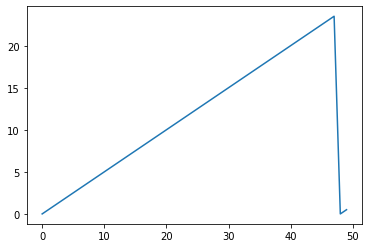

In [9]:
data_t = pd.DataFrame()
data_t['Time'] = raw_data['Hour'] + raw_data['Minute']*(0.5/30)
data_t.head(50).Time.plot()

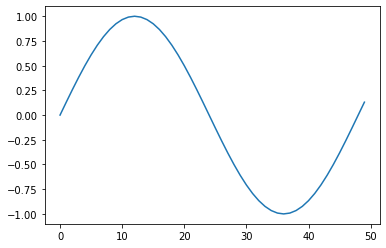

In [10]:
test.head(50).sin_time.plot()

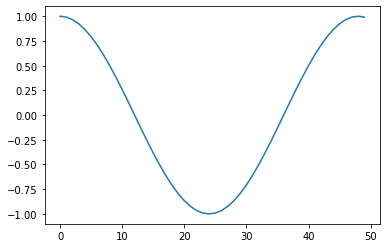

In [11]:
test.head(50).cos_time.plot()

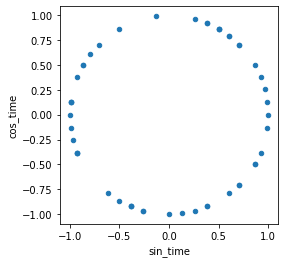

In [12]:
test.sample(50).plot.scatter('sin_time','cos_time').set_aspect('equal')

In [13]:
df_test = []

for i in range(81):
    file_path = '/content/drive/MyDrive/Jupyter/unlimited_power/raw_data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    testset = RG.drop_clms(temp)
    # testset2 = RG.series_to_supervised(testset, n_days, dropnan=False)
    # testset3 = testset2.iloc[-ticks:, :]
    df_test.append(testset)

X_test = pd.concat(df_test)
X_test = X_test.iloc[:, :n_obs]
X_test.shape

(27216, 7)

In [14]:
X = X_test.reset_index()
X.drop('index', axis = 1, inplace = True)
X

,sin_time,cos_time,DHI,DNI,RH,T,TARGET
0,0.000000,1.000000,0,0,34.42,0.0,0.0
1,0.130526,0.991445,0,0,34.17,0.1,0.0
2,0.258819,0.965926,0,0,34.23,0.2,0.0
3,0.382683,0.923880,0,0,33.99,0.3,0.0
4,0.500000,0.866025,0,0,33.97,0.4,0.0
...,...,...,...,...,...,...,...
27211,-0.608761,0.793353,0,0,63.35,13.7,0.0
27212,-0.500000,0.866025,0,0,64.82,13.1,0.0
27213,-0.382683,0.923880,0,0,66.10,12.8,0.0
27214,-0.258819,0.965926,0,0,67.64,12.4,0.0


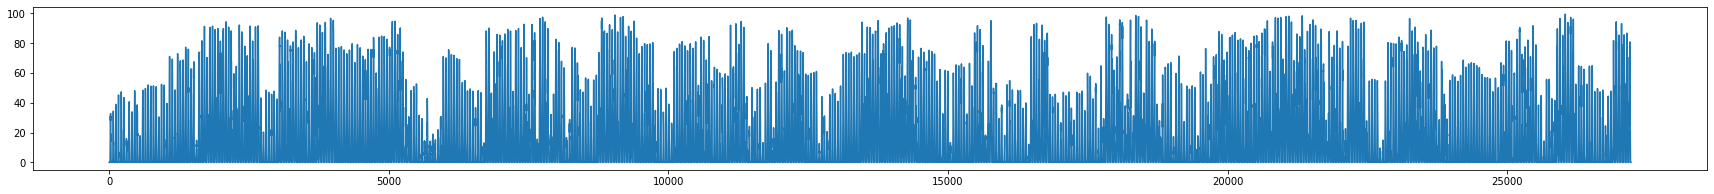

In [15]:
plt.figure(figsize=(30, 3))

X.TARGET.plot()

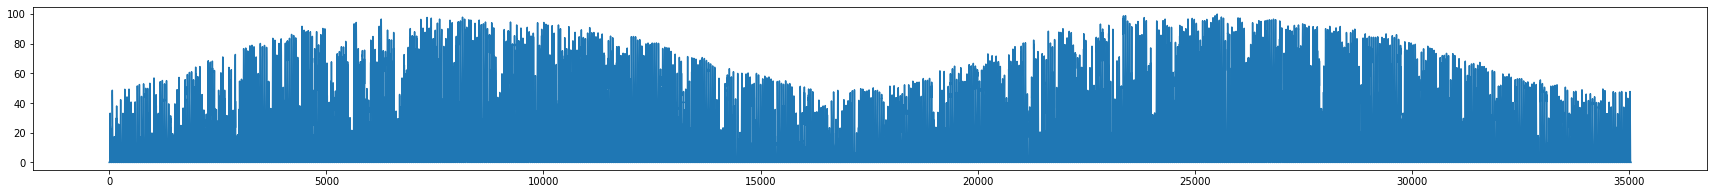

In [28]:
plt.figure(figsize=(30, 3))
test2 = test.iloc[:35040,:]
test2.TARGET.plot()

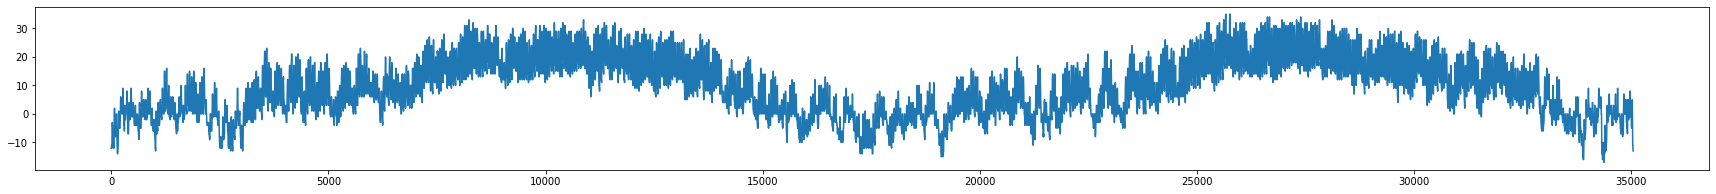

In [30]:
plt.figure(figsize=(30, 3))
test2['T'].plot()

In [20]:
dataset = drop_clms(raw_data)
dataset

,sin_time,cos_time,DHI,DNI,RH,T,TARGET
0,0.000000,1.000000,0,0,69.08,-12,0.0
1,0.130526,0.991445,0,0,69.06,-12,0.0
2,0.258819,0.965926,0,0,71.78,-12,0.0
3,0.382683,0.923880,0,0,71.75,-12,0.0
4,0.500000,0.866025,0,0,75.20,-12,0.0
...,...,...,...,...,...,...,...
52555,-0.608761,0.793353,0,0,70.70,-4,0.0
52556,-0.500000,0.866025,0,0,66.79,-4,0.0
52557,-0.382683,0.923880,0,0,66.78,-4,0.0
52558,-0.258819,0.965926,0,0,67.72,-4,0.0


In [33]:
dataset2 = dataset.iloc[:48,:]
dataset2

,sin_time,cos_time,DHI,DNI,RH,T,TARGET
0,0.000000e+00,1.000000e+00,0,0,69.08,-12,0.000000
1,1.305262e-01,9.914449e-01,0,0,69.06,-12,0.000000
2,2.588190e-01,9.659258e-01,0,0,71.78,-12,0.000000
3,3.826834e-01,9.238795e-01,0,0,71.75,-12,0.000000
4,5.000000e-01,8.660254e-01,0,0,75.20,-12,0.000000
5,6.087614e-01,7.933533e-01,0,0,69.29,-11,0.000000
6,7.071068e-01,7.071068e-01,0,0,72.56,-11,0.000000
7,7.933533e-01,6.087614e-01,0,0,72.55,-11,0.000000
8,8.660254e-01,5.000000e-01,0,0,74.62,-11,0.000000
9,9.238795e-01,3.826834e-01,0,0,74.61,-11,0.000000


In [32]:
staart = 0
ennd = 0
for i in range(1,47):
  K_back = dataset2.iloc[i-1, -1]
  K = dataset2.iloc[i, -1]
  K_forward = dataset2.iloc[i+1, -1]
  if K > 0:
    if K_back == 0:
      staart = i
    elif K_forward == 0:
      ennd = i
print(staart)
print(ennd)

16
33


In [35]:
dataset

,sin_time,cos_time,DHI,DNI,RH,T,TARGET
0,0.000000,1.000000,0,0,69.08,-12,0.0
1,0.130526,0.991445,0,0,69.06,-12,0.0
2,0.258819,0.965926,0,0,71.78,-12,0.0
3,0.382683,0.923880,0,0,71.75,-12,0.0
4,0.500000,0.866025,0,0,75.20,-12,0.0
...,...,...,...,...,...,...,...
52555,-0.608761,0.793353,0,0,70.70,-4,0.0
52556,-0.500000,0.866025,0,0,66.79,-4,0.0
52557,-0.382683,0.923880,0,0,66.78,-4,0.0
52558,-0.258819,0.965926,0,0,67.72,-4,0.0


In [49]:
day_by_day = pd.DataFrame()

k_set = dataset.iloc[:48,:].drop(['sin_time', 'cos_time'], axis = 1)
k_sets = pd.DataFrame(k_set.sum(axis = 0)).transpose()
day_by_day = pd.concat([day_by_day, k_sets], axis = 0)
k_sets

,DHI,DNI,RH,T,TARGET
0,2157.0,3778.0,3375.81,-383.0,312.996029


In [50]:
for i in range(1, 1095):
  k_bf = i*48
  k = (i+1)*48
  k_set = dataset.iloc[k_bf:k,:].drop(['sin_time', 'cos_time'], axis = 1)
  k_sets = pd.DataFrame(k_set.sum(axis = 0)).transpose()
  day_by_day = pd.concat([day_by_day, k_sets], axis = 0)

In [54]:
dbd = day_by_day.reset_index().drop(['index'], axis = 1)
dbd

,DHI,DNI,RH,T,TARGET
0,2157.0,3778.0,3375.81,-383.0,312.996029
1,893.0,14169.0,3563.10,-303.0,529.208849
2,1389.0,1183.0,3661.20,-311.0,151.942952
3,1887.0,3215.0,3153.37,-273.0,278.918759
4,2118.0,1080.0,3521.33,41.0,231.229091
...,...,...,...,...,...
1090,899.0,14709.0,2777.16,-43.0,540.539018
1091,1432.0,9916.0,2652.95,41.0,448.758053
1092,1659.0,8222.0,2362.91,105.0,426.034991
1093,802.0,14871.0,2362.48,81.0,533.480207


DHI


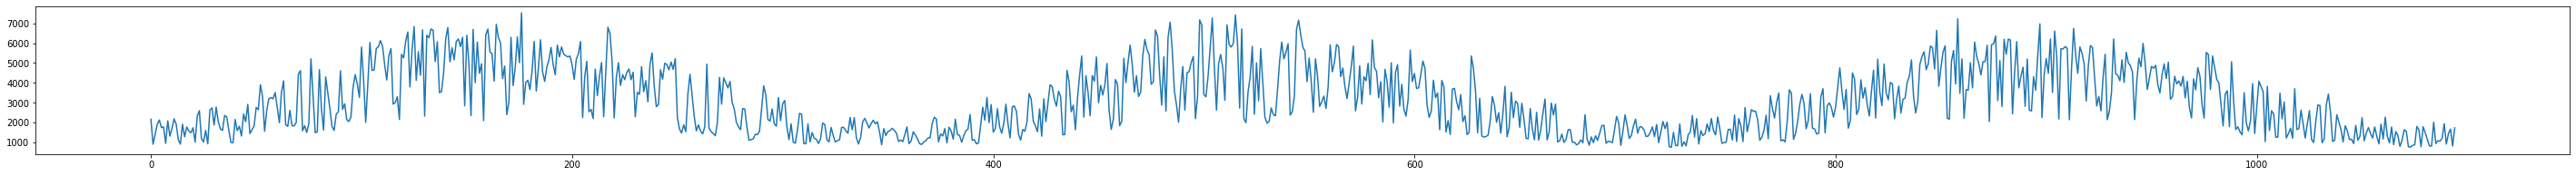

DNI


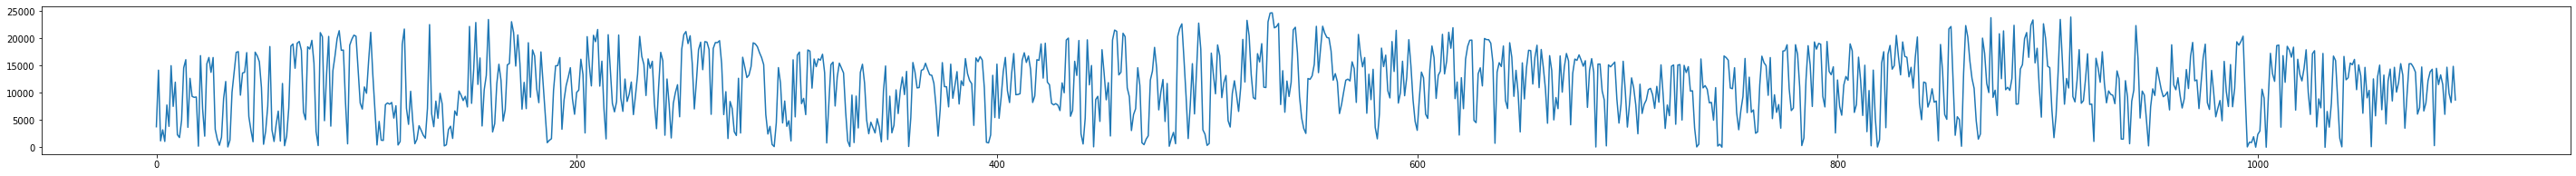

RH


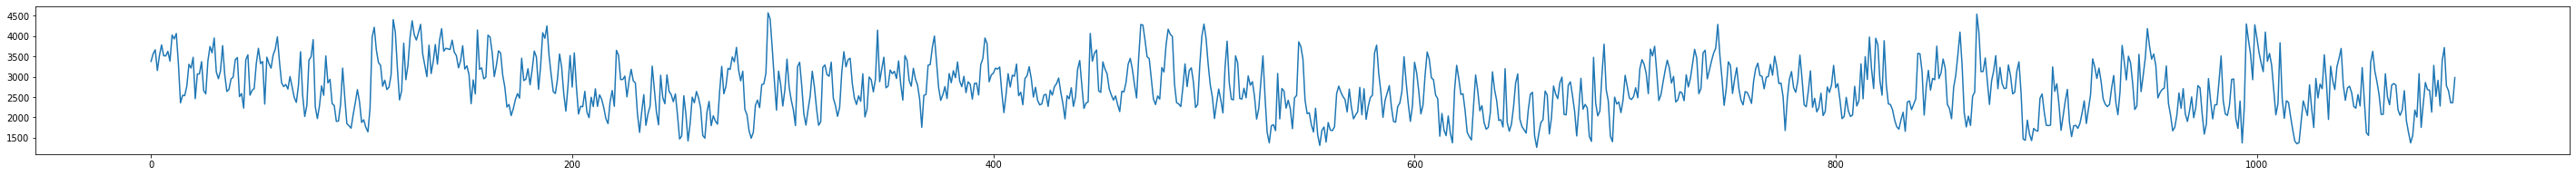

T


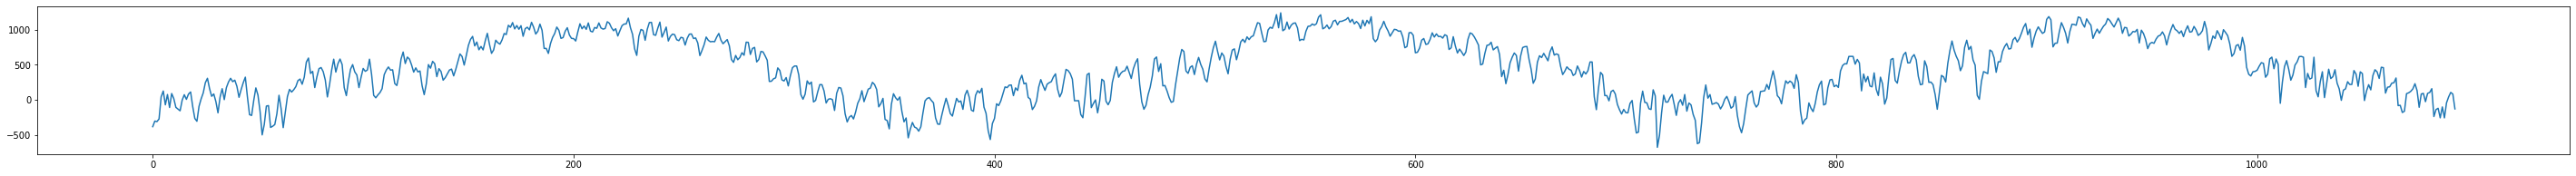

TARGET


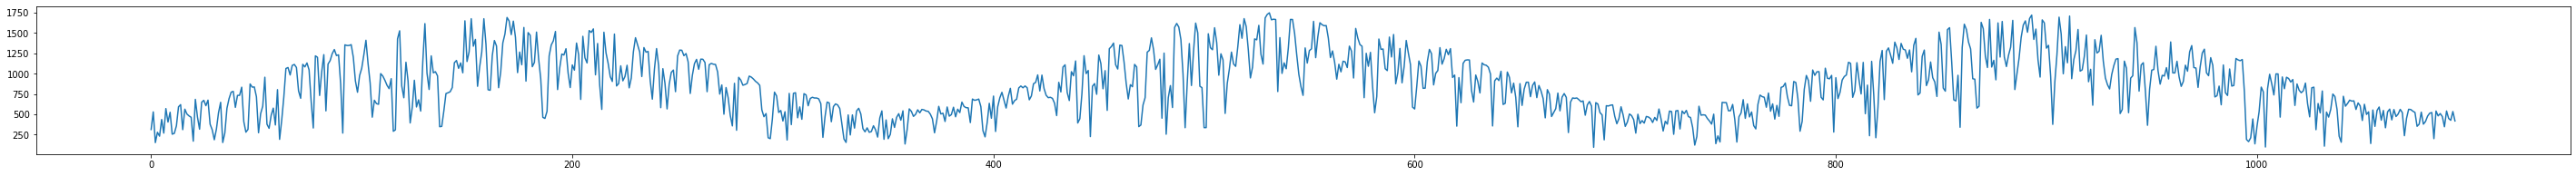

In [56]:
for i in dbd.columns:
  print(i)
  plt.figure(figsize=(50, 3))
  dbd[i].plot()
  plt.show()

In [61]:
date_test = raw_data.copy()
date_test

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0


In [64]:
date_test['Date'] = date_test['Day']%365
date_test

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,Date
0,0,0,0,0,0,1.5,69.08,-12,0.0,0
1,0,0,30,0,0,1.5,69.06,-12,0.0,0
2,0,1,0,0,0,1.6,71.78,-12,0.0,0
3,0,1,30,0,0,1.6,71.75,-12,0.0,0
4,0,2,0,0,0,1.6,75.20,-12,0.0,0
...,...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0,364
52556,1094,22,0,0,0,2.4,66.79,-4,0.0,364
52557,1094,22,30,0,0,2.2,66.78,-4,0.0,364
52558,1094,23,0,0,0,2.1,67.72,-4,0.0,364
